In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
floc='/content/drive/MyDrive/sweta/fst/new_data/'

In [ ]:
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot
from scipy.stats import ranksums
import statsmodels.api as sm

In [ ]:
def civalue(x):
    mx=np.mean(x)
    ci=np.zeros((2))
    ci[0]=mx-1.96*x.std()/math.sqrt(len(x))
    ci[1]=mx+1.96*x.std()/math.sqrt(len(x))
    return ci

def crosscorr(x,n):
    sef=np.zeros((n))
    for i in range(0,n):
        sef[i]=i+1
    for i in range(0,x.shape[1]-1):
        for j in range(0,x.shape[1]-1):
            if (np.array(np.where(sef==i)).shape[1]>0 and np.array(np.where(sef==j)).shape[1]>0):
                if i!=j and (x[i,j]>=0.7 or x[i,j]<=-0.7):
                    sef[np.array(np.where(sef==j))]=0;
    return sef

In [ ]:
from scipy import stats
def sigtetfinal(j):
    fname=floc+'data'+str(j+1)+'.csv'
    df=np.genfromtxt(fname,delimiter=',')
    civ=np.zeros((df.shape[1]-1,4))
    p=np.zeros((df.shape[1]-1))
    y=df[:,-1]
    in0=np.where(y<=0)
    in1=np.where(y>0)
    for i in range(0,df.shape[1]-1):
        fv=df[:,i]
        civ[i,0:2]=civalue(fv[in0])
        civ[i,2:4]=civalue(fv[in1])
        x=np.zeros((2,2))
        w,p[i]=ranksums(fv[in0],fv[in1])
        pyplot.close()
    return civ,p,df

In [ ]:
def coranaf(df,sigfn):
    corr=np.zeros((sigfn.shape[0],sigfn.shape[0]))
    for i in range(0,sigfn.shape[0]):
        for j in range(0,sigfn.shape[0]):
            a=np.corrcoef(df[:,sigfn[i]],df[:,sigfn[j]])
            corr[i,j]=a[0,1]
    sg=crosscorr(corr,sigfn.shape[0])
    return sg

In [ ]:
cou=2
for i in range(0,250):
    civ,p,df=sigtetfinal(i)
    sigf=np.where(p<=0.05)
    data=np.concatenate((df[:,sigf[0]],df[:,-1].reshape(-1,1)), axis=1)
    fname=floc+'data'+str(250+i+1)+".csv"
    np.savetxt(fname,data, delimiter=',', fmt='%f')
    sg=coranaf(df,sigf[0])
    sg=np.where(sg>0)
    s=sigf
    s=s[0]
    s=s[sg[0]]
    data=np.concatenate((df[:,s],df[:,-1].reshape(-1,1)), axis=1)
    fname=floc+'data'+str(500+i+1)+".csv"
    np.savetxt(fname,data, delimiter=',', fmt='%f')

In [ ]:
from sklearn.decomposition import PCA
for i in range(0,250):
    fname=floc+'data'+str(i+1)+'.csv'
    df=np.genfromtxt(fname,delimiter=',')
    if i==15:
      df=np.nan_to_num(df)
    n=int(math.log2(df.shape[1]-1))
    pca = PCA(n_components=n)
    pca.fit(df[:,0:-1])
    data=pca.transform(df[:,0:-1])
    data=np.concatenate((data,df[:,-1].reshape(-1,1)), axis=1)
    fname=floc+'data'+str(750+i+1)+".csv"
    np.savetxt(fname,data, delimiter=',', fmt='%f')

In [ ]:
from sklearn.cluster import KMeans
from scipy.stats import chi2_contingency
def chrv(f,lab):
  if np.mean(lab)==0:
    data = [[1,1], [1,1]]
    return data,1
  else:
    kclus=KMeans(n_clusters=2).fit(f.reshape(-1,1))
    flab=kclus.labels_
    in1=np.where(flab==0)
    labv=lab[in1[0]]
    in2=np.where(labv==0)
    in3=np.where(labv==1)
    x1=len(in2[0])
    x2=len(in3[0])
    in1=np.where(flab==1)
    labv=lab[in1[0]]
    in2=np.where(labv==0)
    in3=np.where(labv==1)
    x3=len(in2[0])
    x4=len(in3[0])
    data = [[x1+1,x2+1], [x3+1,x4+1]]
    stat, p, dof, expected = chi2_contingency(data)
    return data,p

In [ ]:
def chr_p(data):
  p=np.zeros((np.shape(data)[1]))
  for i in range(0,np.shape(data)[1]-1):
    d,p[i]=chrv(data[:,i],data[:,-1])
  return p

In [ ]:
import numpy as np
for i in range(0,250):
  fname=floc+'data'+str(i+1)+'.csv'
  data=np.genfromtxt(fname,delimiter=',')
  data=np.nan_to_num(data)
  pval=chr_p(data)
  in1=np.where(pval<=0.05)
  data=data[:,in1[0]]
  fname=floc+'data'+str(250*4+i+1)+'.csv'
  np.savetxt(fname,data,delimiter=',',fmt='%f')
  print(i+1,len(in1[0]))

1 16
2 13
3 14
4 15
5 11
6 11
7 12


/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


8 16
9 9
10 17
11 11
12 20
13 4
14 7
15 11
16 18
17 8
18 11
19 4
20 14
21 12
22 13
23 5
24 11
25 14
26 25
27 6
28 12
29 5
30 14
31 5
32 20
33 2
34 3
35 3
36 6
37 2
38 13
39 1
40 11
41 23
42 13
43 7
44 16
45 12
46 22
47 12
48 19
49 14
50 16
51 14
52 25
53 12
54 17
55 11
56 28
57 16
58 12
59 12
60 11
61 14
62 13
63 3
64 15
65 14
66 17
67 4
68 10
69 9
70 15
71 25
72 32
73 16
74 22
75 20
76 29
77 17


/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


78 27
79 13
80 29
81 26
82 29
83 16
84 26
85 24
86 34
87 18


/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


88 24
89 13
90 28
91 19
92 33
93 14
94 14
95 15
96 15
97 15


/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


98 28
99 8
100 26
101 31
102 30
103 20
104 30
105 26
106 31
107 22


/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


108 36
109 20
110 27
111 30
112 39
113 24
114 28
115 22
116 38
117 28


/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


118 25
119 22
120 26
121 29
122 25
123 15
124 28
125 21
126 26
127 15


/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


128 24
129 18
130 29
131 20
132 30
133 9
134 24
135 22
136 56
137 16
138 14
139 12
140 50
141 24
142 47
143 13
144 52
145 52
146 72
147 14
148 25
149 20
150 35
151 20
152 61
153 7
154 8
155 8
156 10
157 7
158 45
159 4
160 35
161 83
162 64
163 31
164 54
165 26
166 47


/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


167 25
168 59
169 27
170 65
171 39
172 56
173 18
174 59
175 40
176 67


/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


177 31
178 27
179 23
180 63
181 27
182 38
183 12
184 47
185 50
186 75
187 17
188 16
189 21
190 40
191 33
192 44
193 21
194 38
195 29
196 61
197 28


/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


198 31
199 20
200 65
201 40
202 61
203 25
204 66
205 62
206 81
207 25


/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


208 39
209 27
210 50
211 35
212 73
213 21
214 23
215 19
216 22
217 19


/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


218 60
219 10
220 49
221 88
222 76
223 36
224 66
225 37
226 50


/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


227 33


/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


228 71
229 36
230 79
231 53
232 70
233 30
234 70
235 50
236 81


/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


237 43


/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


238 40
239 34
240 80
241 44
242 50
243 24
244 63
245 58
246 88
247 27


/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


248 31
249 29
250 56


In [ ]:
from sklearn.cluster import KMeans
def gvcal(f,lab):
  kmeans = KMeans(n_clusters=2, random_state=0).fit(f.reshape(-1,1))
  in1=np.where(kmeans.labels_==0)
  in2=np.where(kmeans.labels_==1)
  jobs=lab[in1[0]]
  in10=len(np.where(jobs==0)[0])
  in11=len(np.where(jobs==1)[0])
  jobs=lab[in2[0]]
  in20=len(np.where(jobs==0)[0])
  in21=len(np.where(jobs==1)[0])
  glf=1-(in10/(len(in1[0])+1))*(in10/(len(in1[0])+1))-(in11/(len(in1[0])+1))*(in11/(len(in1[0])+1))
  grf=1-(in20/(len(in2[0])+1))*(in20/(len(in2[0])+1))-(in21/(len(in2[0])+1))*(in21/(len(in2[0])+1))
  gv=(len(in1[0])/len(f))*glf+(len(in2[0])/len(f))*grf
  return gv

In [ ]:
import math
import numpy as np
for i in range(0,250):
  fname=floc+'data'+str(i+1)+'.csv'
  data=np.genfromtxt(fname,delimiter=',')
  data=np.nan_to_num(data)
  gv=[gvcal(data[:,j],data[:,-1]) for j in range(0,np.shape(data)[1]-1)]
  imp=np.argsort(gv)
  n=int(math.log2(data.shape[1]-1))
  data1=data[:,imp[0:n]]
  data=np.concatenate((data1,data[:,-1].reshape(-1,1)), axis=1)
  fname=floc+'data'+str(250*5+i+1)+'.csv'
  np.savetxt(fname,data,delimiter=',',fmt='%f')
  print(i)

0
1
2
3
4
5
6
7


/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76


/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


77
78
79
80
81
82
83
84
85
86


/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


87
88
89
90
91
92
93
94
95
96


/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


97
98
99
100
101
102
103
104
105
106


/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


107
108
109
110
111
112
113
114
115
116


/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


117
118
119
120
121
122
123
124
125
126


/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165


/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


166
167
168
169
170
171
172
173
174
175


/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196


/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


197
198
199
200
201
202
203
204
205
206


/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


207
208
209
210
211
212
213
214
215
216


/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


217
218
219
220
221
222
223
224
225


/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


226


/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


227
228
229
230
231
232
233
234
235


/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


236


/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


237
238
239
240
241
242
243
244
245
246


/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


247
248
249


In [ ]:
from sklearn.metrics import (
    f1_score, precision_score, recall_score,accuracy_score
    )
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
def model1(trdata,tsdata,tract,tsact):
  model = DecisionTreeClassifier().fit(trdata,tract)
  pred= model.predict(tsdata)
  acc=accuracy_score(tsact,pred)
  return acc
def normalizedata(X_train):
    scaler = MinMaxScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    return X_train

In [ ]:
from sklearn.model_selection import KFold
kf = KFold(3)
def accv(data,chr):
  in1=np.where(chr==1)
  lab=data[:,-1]
  data=data[:,in1[0]]
  acv=np.zeros((3))
  c=0
  data=normalizedata(data)
  for train_index, test_index in kf.split(data):
    trdata=data[train_index,:]
    tsdata=data[test_index,:]
    tract=lab[train_index]
    tsact=lab[test_index]
    acv[c]=model1(trdata,tsdata,tract,tsact)
    c=c+1
  return np.mean(acv)

In [ ]:
def fitness(data,chr,noc):
  #acv=[accv(data,chr[i,:]) for i in range(0,noc)]
  fit=np.zeros((noc))
  for i in range(0,noc):
    in1=np.where(chr[i,:]==1)
    if len(in1[0])<=1:
      fit[i]=0
    else:
      fit[i]=0.8*accv(data,chr[i,:])+0.2*((20-len(in1[0]))/20)
  return fit

In [ ]:
import random
def crossover(chr,noc):
  an=random.sample(range(0, noc),noc)
  nchrv=np.zeros((int(noc/2),np.shape(chr)[1]))
  mid=int(np.shape(chr)[1]/2)
  for i in range(0,int(noc/2)):
    a=an[2*i]
    b=an[2*i+1]
    nchrv[i,0:mid]=chr[a,0:mid]
    nchrv[i,mid+1:]=chr[b,mid+1:]
  return nchrv

In [ ]:
def mutation(chr,noc):
  modp=np.shape(chr)[1]*0.1
  modp=int(modp)
  moc=np.random.randint(0,np.shape(chr)[1],[noc,modp])
  for i in range(0,noc):
    for j in range(0,modp):
      chr[i,moc[i,j]]=1-chr[i,moc[i,j]]
  return chr

In [ ]:
def gafst(data):
  noc=50
  chr=np.random.randint(0,2,[noc,np.shape(data)[1]-1])
  bfit=0
  iter=0
  c=0
  while iter<=50 and c<=7:
    fit=fitness(data,chr,noc)
    cbfit=np.max(fit)
    bch=np.argmax(fit)
    if cbfit>bfit:
      bfit=cbfit
      bchr=chr[bch,:]
      c=0
    else:
      c=c+1
    in1=np.where(bchr==1)
    #print(iter,bfit,len(in1[0]))
    chr[0:int(noc/2),:]=crossover(chr,noc)
    chr[0:int(noc/2),:]=mutation(chr[0:int(noc/2),:],25)
    chr[int(noc/2):,:]=np.random.randint(0,2,[int(noc/2),np.shape(data)[1]-1])
    iter=iter+1
  return bchr

In [ ]:
for i in range(0,250):
  fname=floc+'data'+str(i+1)+'.csv'
  data=np.genfromtxt(fname,delimiter=',')
  data=np.nan_to_num(data)
  print(np.shape(data))
  bchr=gafst(data)
  in1=np.where(bchr==1)
  data1=data[:,in1[0]]
  data=np.concatenate((data1,data[:,-1].reshape(-1,1)), axis=1)
  fname=floc+'data'+str(250*6+i+1)+'.csv'
  np.savetxt(fname,data,delimiter=',',fmt='%f')
  print(i)

(738, 21)
0
(907, 21)
1
(348, 21)
2
(307, 21)
3
(336, 21)
4
(435, 21)
5
(250, 21)
6
(812, 21)
7
(227, 21)
8
(860, 21)
9
(738, 33)
10
(907, 33)
11
(348, 33)
12
(307, 33)
13
(336, 33)
14
(435, 33)
15
(250, 33)
16
(812, 33)
17
(227, 33)
18
(860, 33)
19
(738, 33)
20
(907, 33)
21
(348, 33)
22
(307, 33)
23
(336, 33)
24
(435, 33)
25
(250, 33)
26
(812, 33)
27
(227, 33)
28
(860, 33)
29
(738, 33)
30
(907, 33)
31
(348, 33)
32
(307, 33)
33
(336, 33)
34
(435, 33)
35
(250, 33)
36
(812, 33)
37
(227, 33)
38
(860, 33)
39
(738, 33)
40
(907, 33)
41
(348, 33)
42
(307, 33)
43
(336, 33)
44
(435, 33)
45
(250, 33)
46
(812, 33)
47
(227, 33)
48
(860, 33)
49
(738, 33)
50
(907, 33)
51
(348, 33)
52
(307, 33)
53
(336, 33)
54
(435, 33)
55
(250, 33)
56
(812, 33)
57
(227, 33)
58
(860, 33)
59
(738, 33)
60
(907, 33)
61
(348, 33)
62
(307, 33)
63
(336, 33)
64
(435, 33)
65
(250, 33)
66
(812, 33)
67
(227, 33)
68
(860, 33)
69
(738, 53)
70
(907, 53)
71
(348, 53)
72
(307, 53)
73
(336, 53)
74
(435, 53)
75
(250, 53)
76
(812, 53)

In [ ]:
pip install scikit-fda

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 70.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.3/72.3 kB 6.0 MB/s eta 0:00:00


In [ ]:
from skfda.ml.clustering import FuzzyCMeans
import skfda
def fuzfst(data):
  fd = skfda.FDataGrid(data[:,0:-1])
  n=int(math.log2(data.shape[1]-1))
  c3=FuzzyCMeans(n_clusters=3,random_state=0).fit(fd)
  datan=c3.membership_degree_
  datan=np.concatenate((datan,data[:,-1].reshape(-1,1)), axis=1)
  return datan

In [ ]:
for i in range(0,250):
  fname=floc+'data'+str(i+1)+'.csv'
  data=np.genfromtxt(fname,delimiter=',')
  data=fuzfst(data)
  fname=floc+'data'+str(250*7+i+1)+'.csv'
  np.savetxt(fname,data,delimiter=',',fmt='%f')
  print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249


In [ ]:
acv=np.zeros((182*8,25))
fmea=np.zeros((182*8,25))
pre=np.zeros((182*8,25))
rec=np.zeros((182*8,25))
for i in range(0,182*8):
    fname= floc+str(i)+"pred.csv"
    data1=np.genfromtxt(fname,delimiter=',')
    y1=data1[:,-1]
    for j in range(0,25):
        acv[i,j]=accuracy_score(y1, data1[:,j])
        fmea[i,j]= f1_score(y1, data1[:,j])
        pre[i,j]= f1_score(y1, data1[:,j])
        rec[i,j]= f1_score(y1, data1[:,j])
fname=floc+'acc.csv'
np.savetxt(fname,acv, delimiter=',', fmt='%f')
fname=floc+'fmea.csv'
np.savetxt(fname,fmea, delimiter=',', fmt='%f')
fname=floc+'pre.csv'
np.savetxt(fname,pre, delimiter=',', fmt='%f')
fname=floc+'rec.csv'
np.savetxt(fname,rec, delimiter=',', fmt='%f')

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
def roc_curve_and_score(y_test, pred_proba):
    fpr, tpr, _ = roc_curve(y_test.ravel(), pred_proba.ravel())
    roc_auc = roc_auc_score(y_test.ravel(), pred_proba.ravel())
    return fpr, tpr, roc_auc

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
def gran(y1,i,j,k):
    plt.figure(figsize=(8, 6))
    matplotlib.rcParams.update({'font.size': 14})
    plt.grid()
    fpr, tpr, roc_auc = roc_curve_and_score(y1[:,1],y1[:,0])
    plt.plot(fpr, tpr, color='darkorange', lw=2,
         label='SOFM={0:.3f}'.format(roc_auc))
    fpr, tpr, roc_auc = roc_curve_and_score(y1[:,3],y1[:,2])
    plt.plot(fpr, tpr, color='green', lw=2,
         label='EMB32={0:.3f}'.format(roc_auc))
    fpr, tpr, roc_auc = roc_curve_and_score(y1[:,5],y1[:,4])
    plt.plot(fpr, tpr, color='Orange', lw=2,
         label='BOTH32={0:.3f}'.format(roc_auc))

    fpr, tpr, roc_auc = roc_curve_and_score(y1[:,7],y1[:,6])
    plt.plot(fpr, tpr, color='crimson', lw=2,
         label='EMB128={0:.3f}'.format(roc_auc))

    fpr, tpr, roc_auc = roc_curve_and_score(y1[:,9],y1[:,8])
    plt.plot(fpr, tpr, color='Aqua', lw=2,
         label='BOTH128={0:.3f}'.format(roc_auc))

    plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
    plt.legend(loc="lower right")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('1 - Specificity')
    plt.ylabel('Sensitivity')

    fna=floc+'auc/Porj'+str(i)+'Emb_'+str(j)+'CL_'+str(k)+".jpg"
    plt.savefig(fna)

<ipython-input-23-8a9303e54706>:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(8, 6))


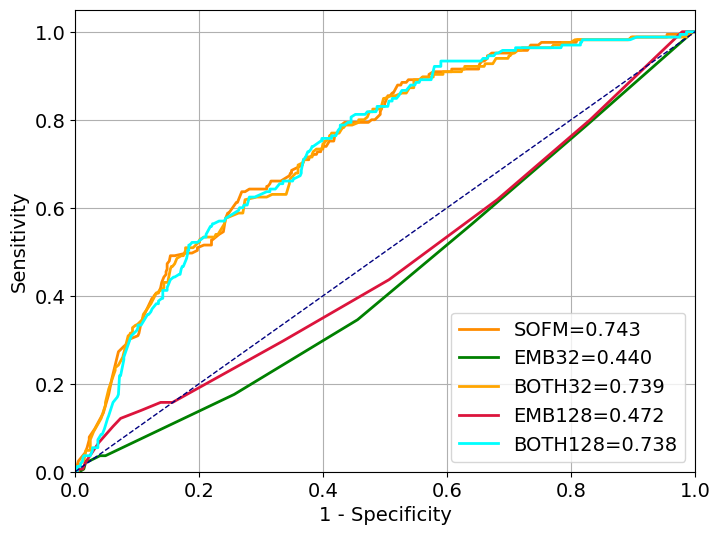

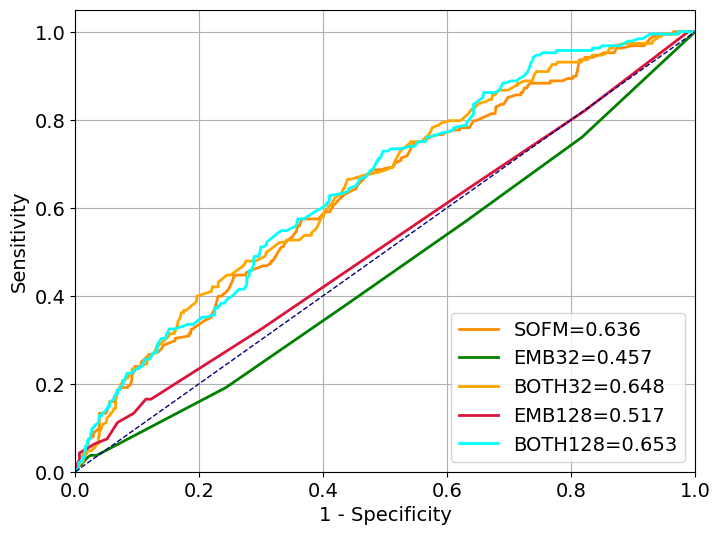

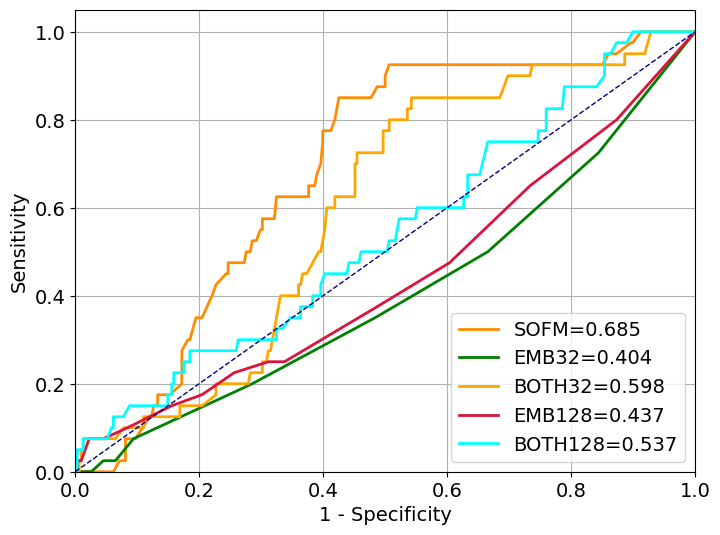

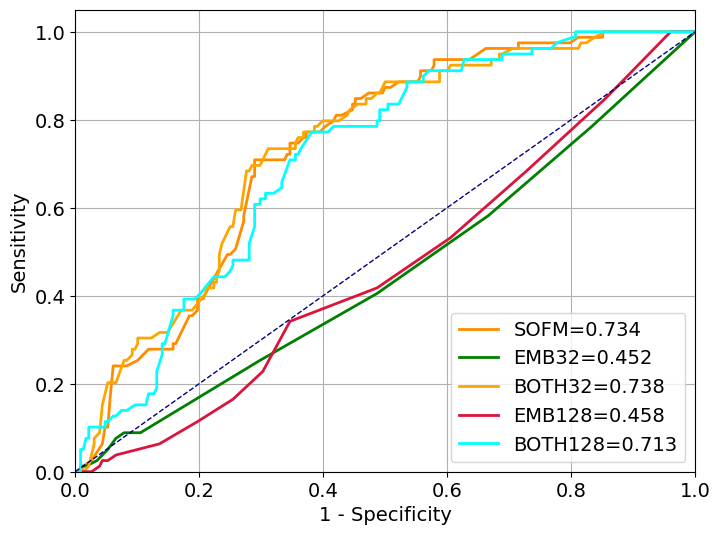

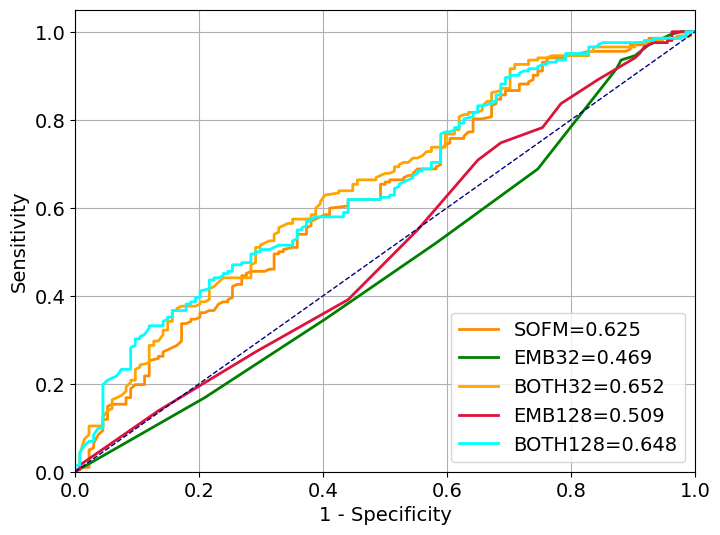

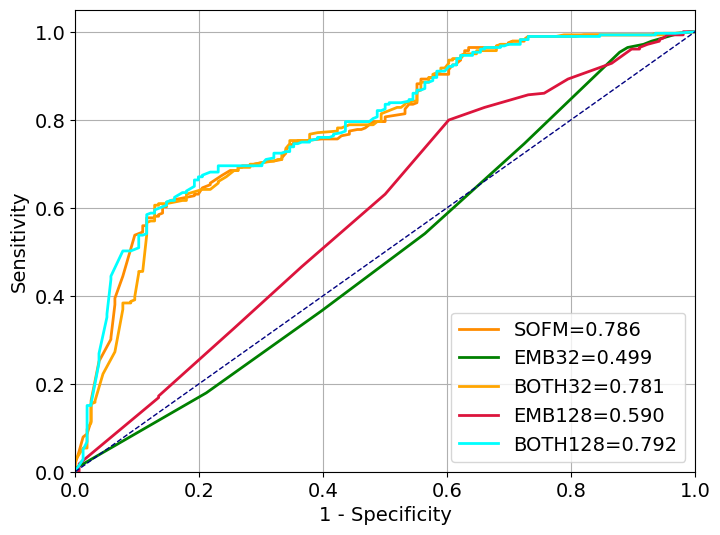

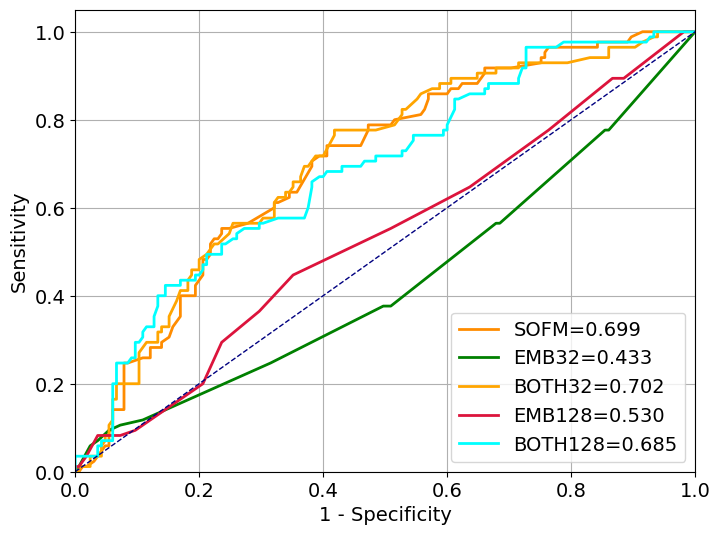

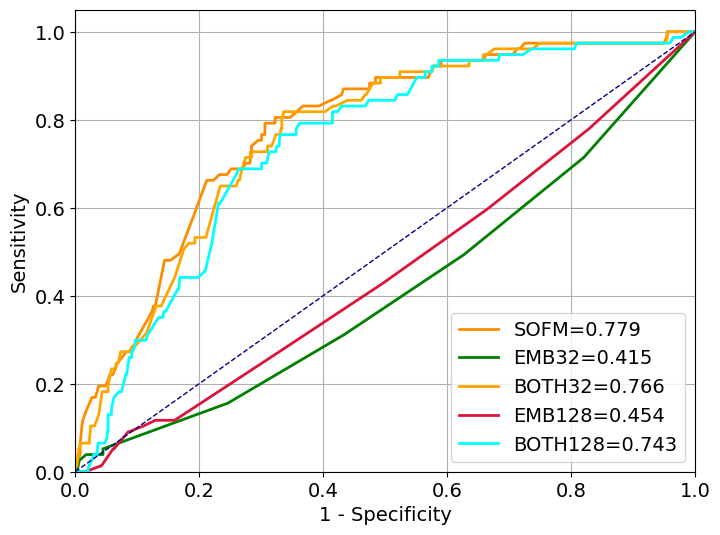

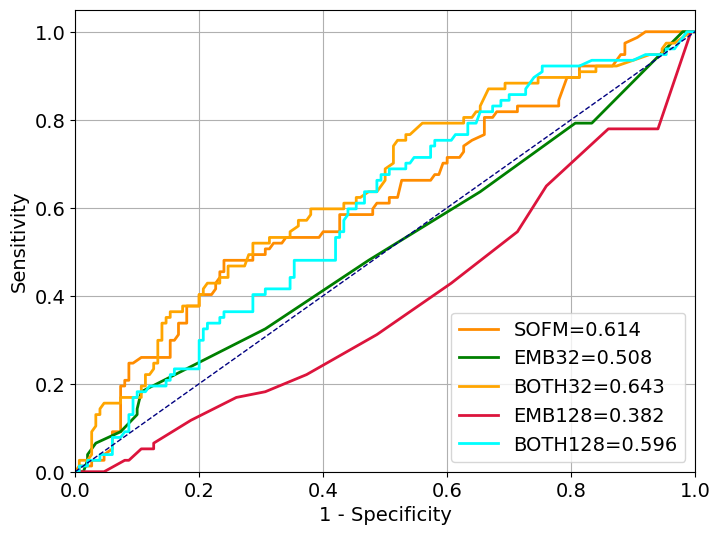

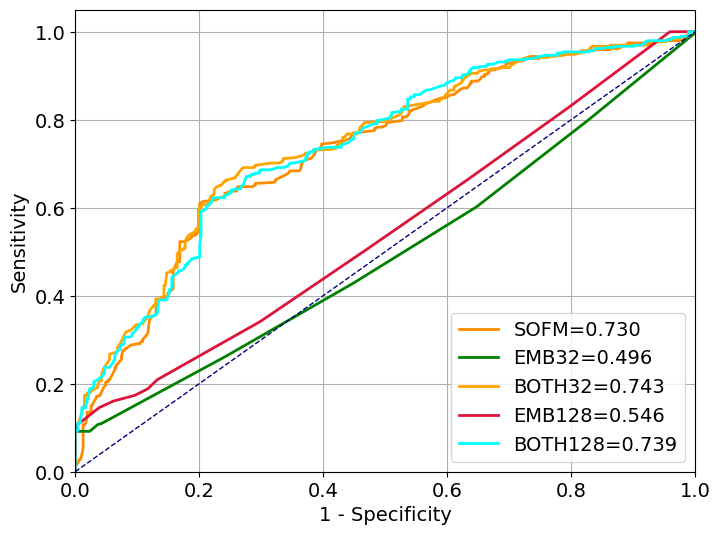

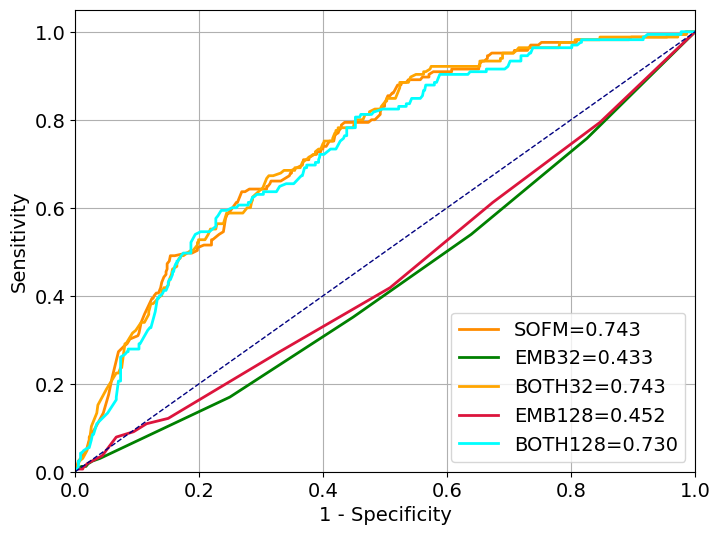

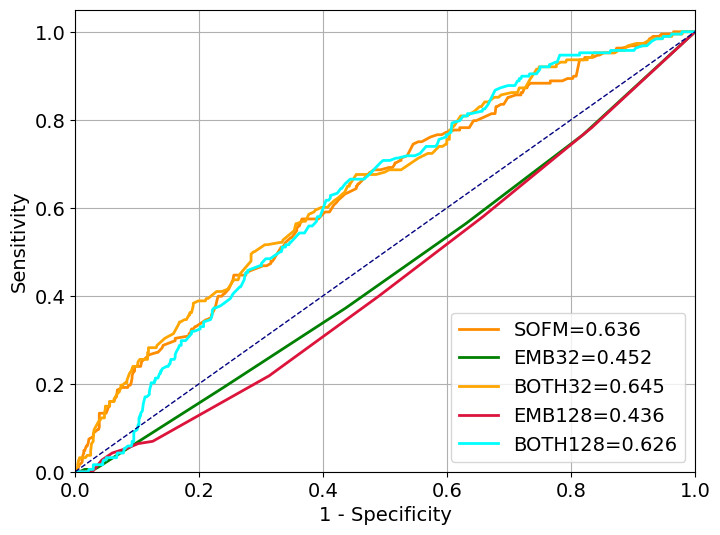

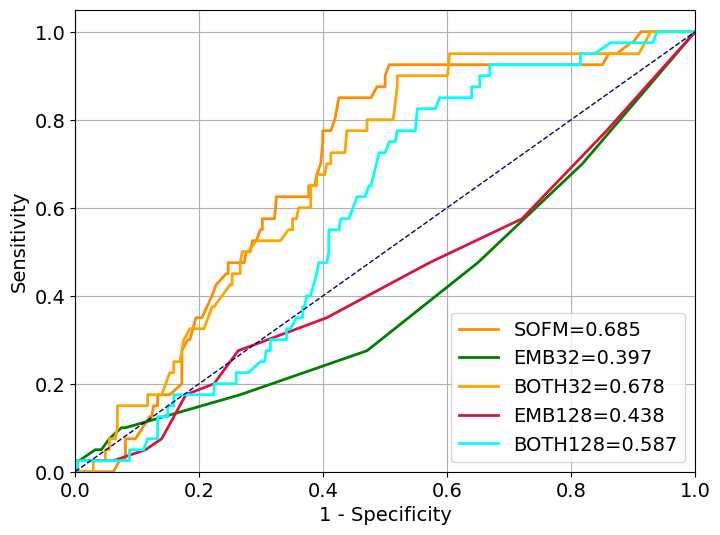

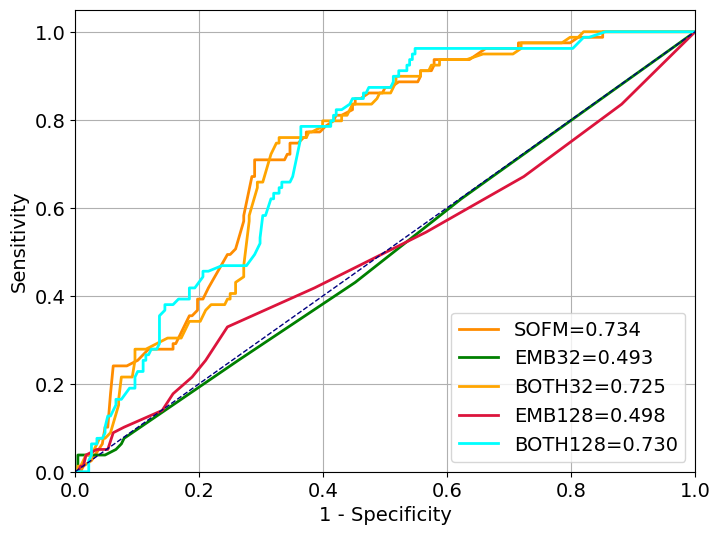

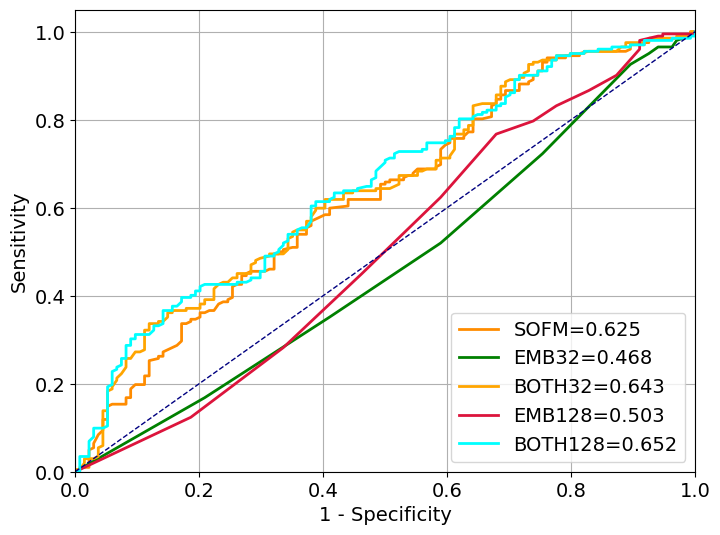

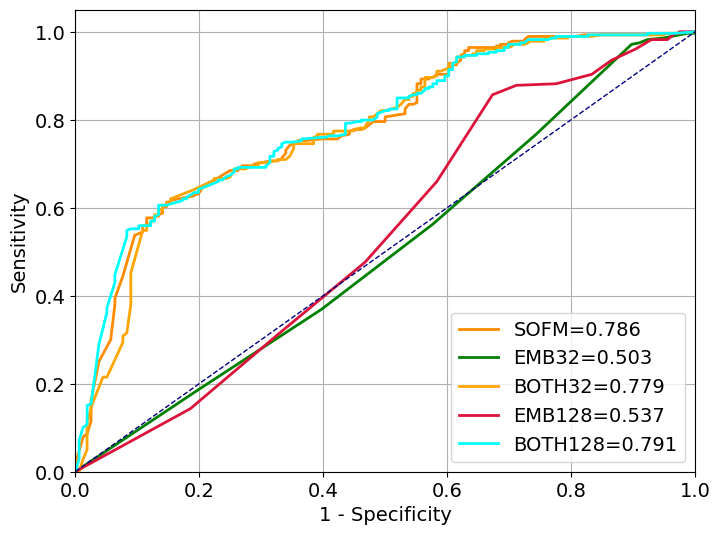

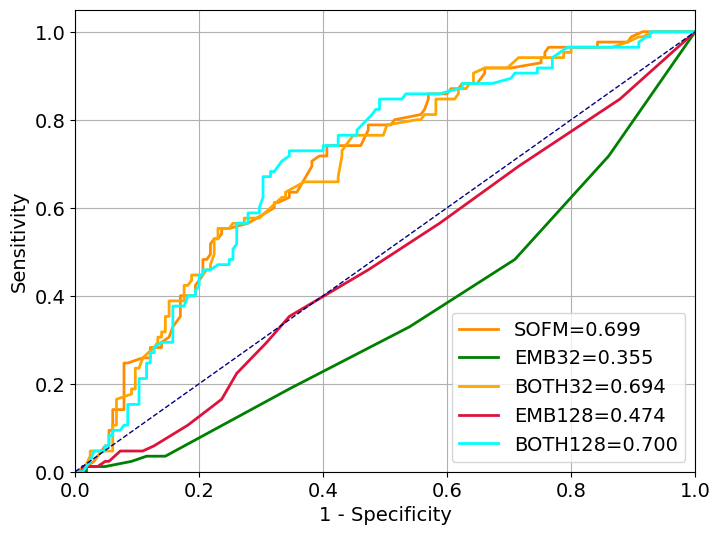

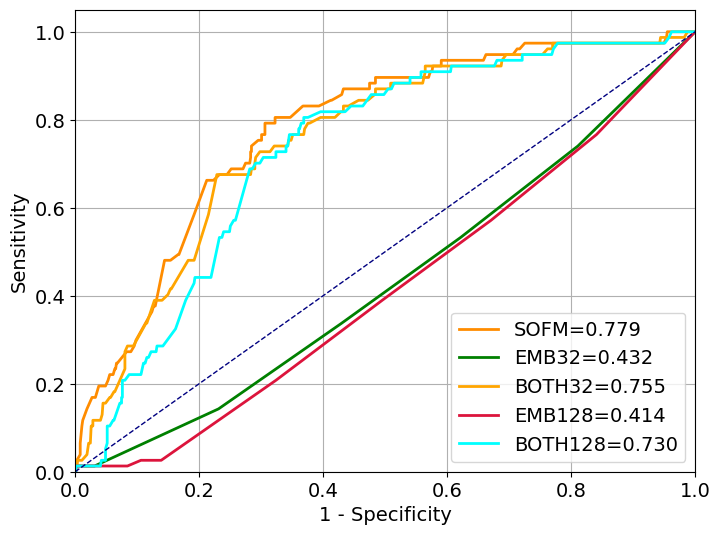

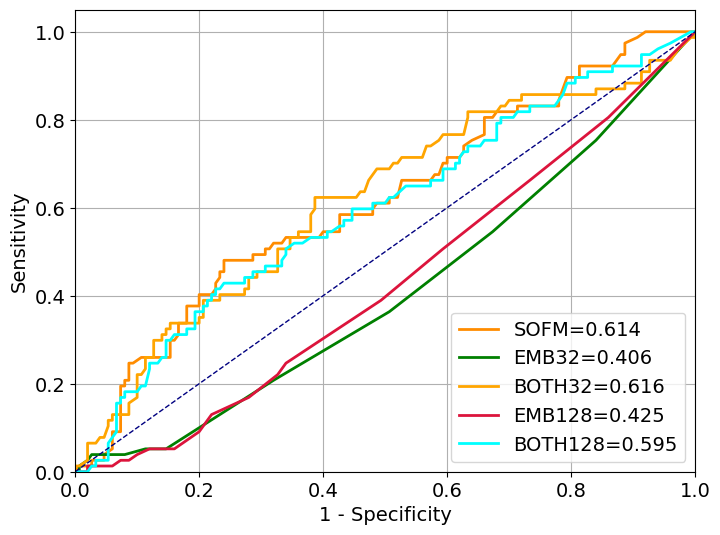

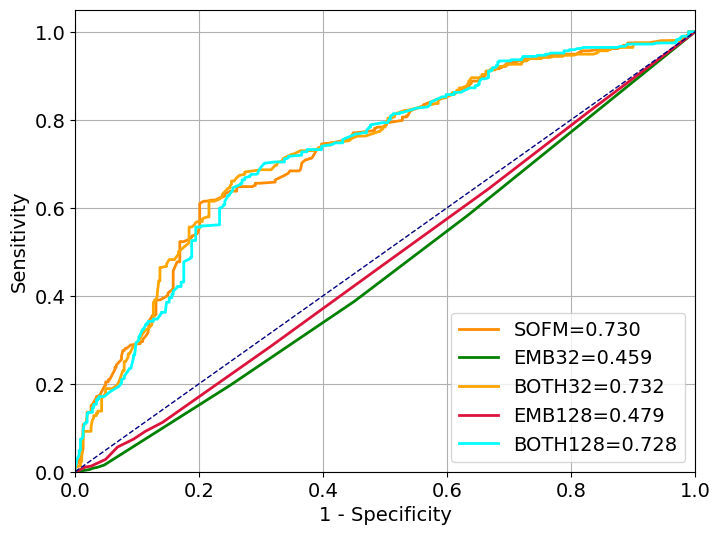

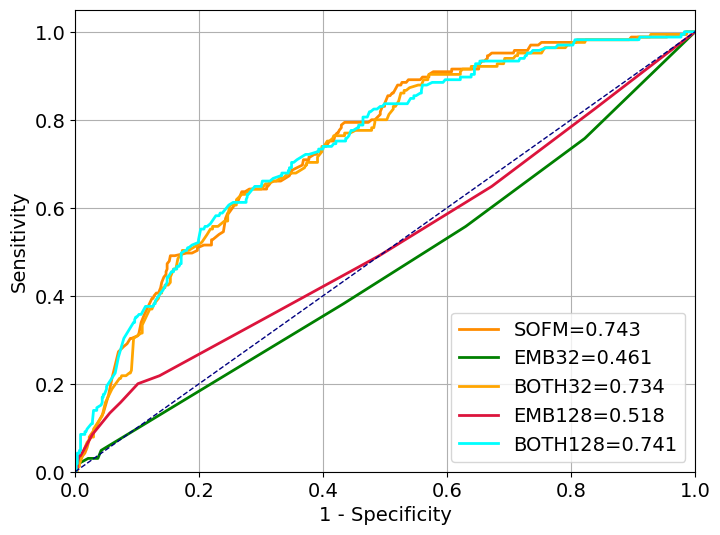

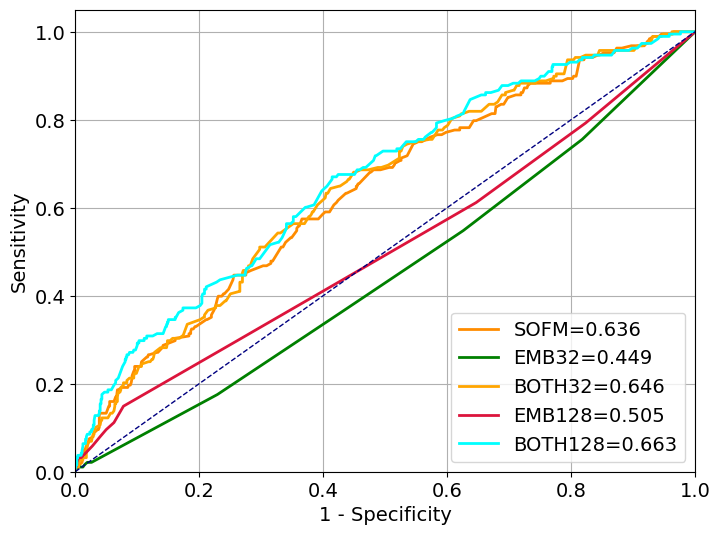

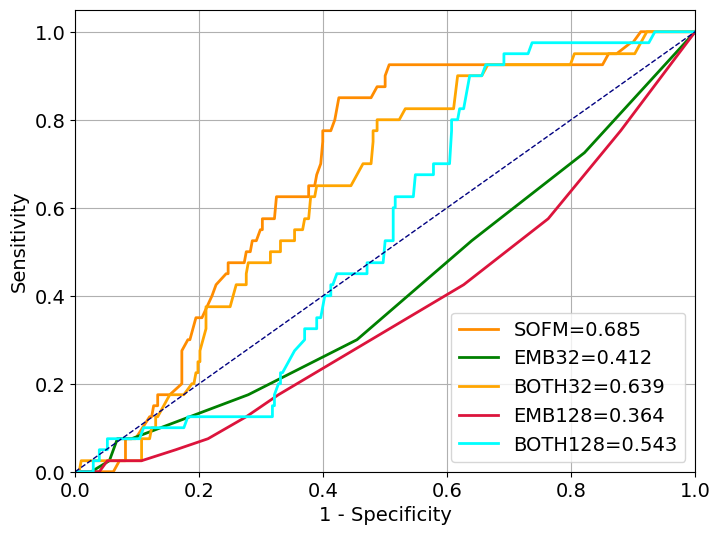

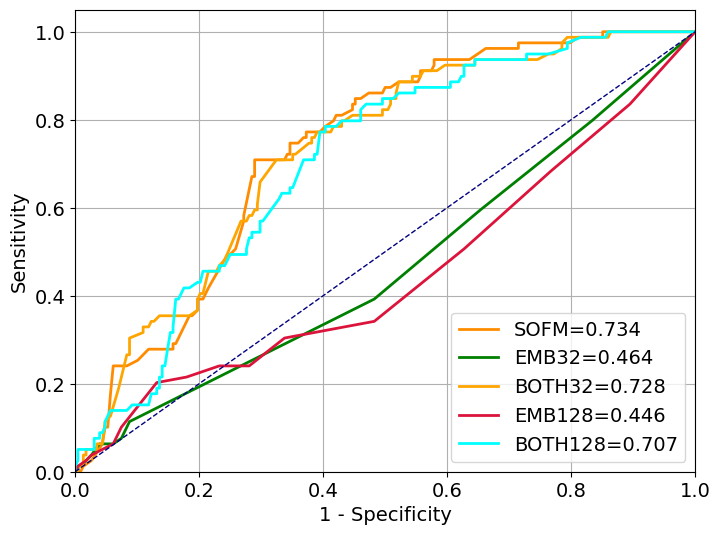

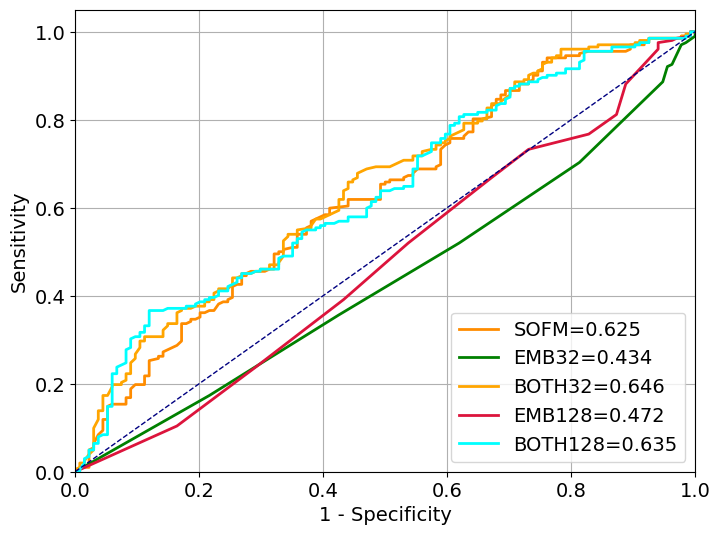

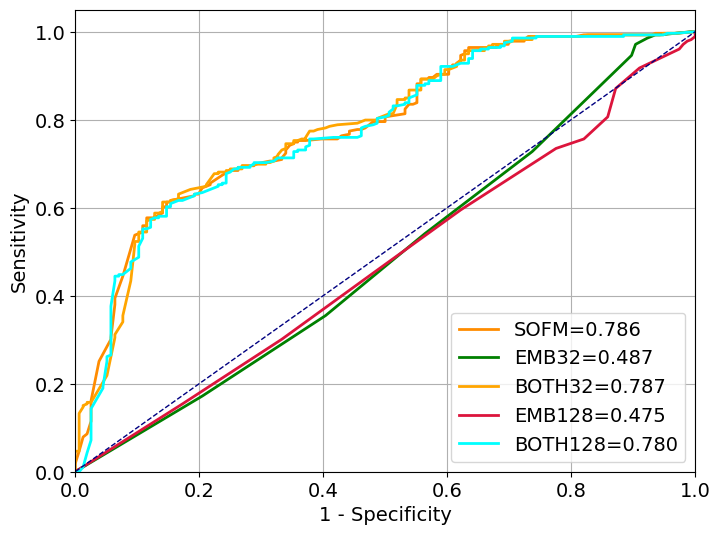

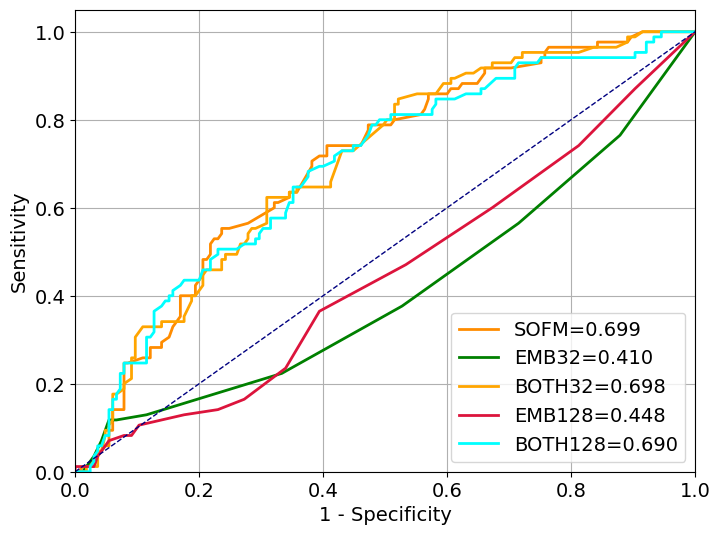

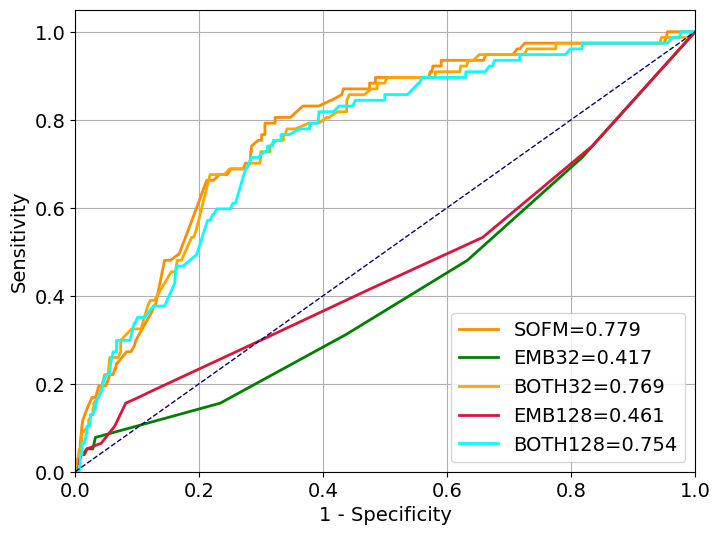

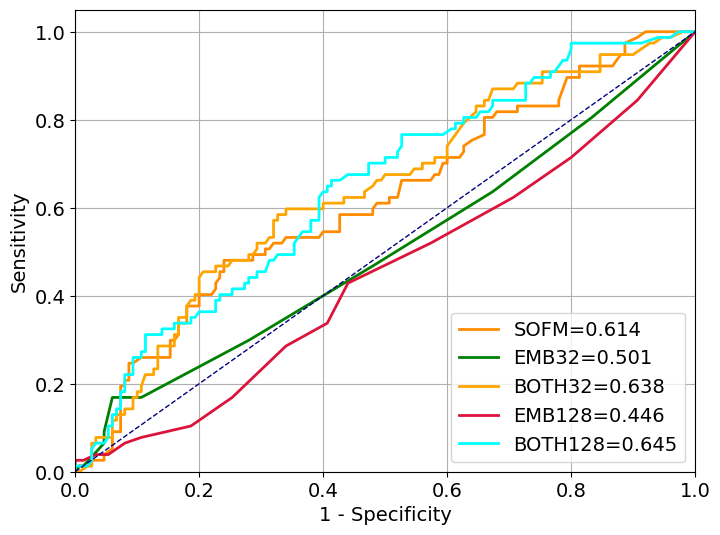

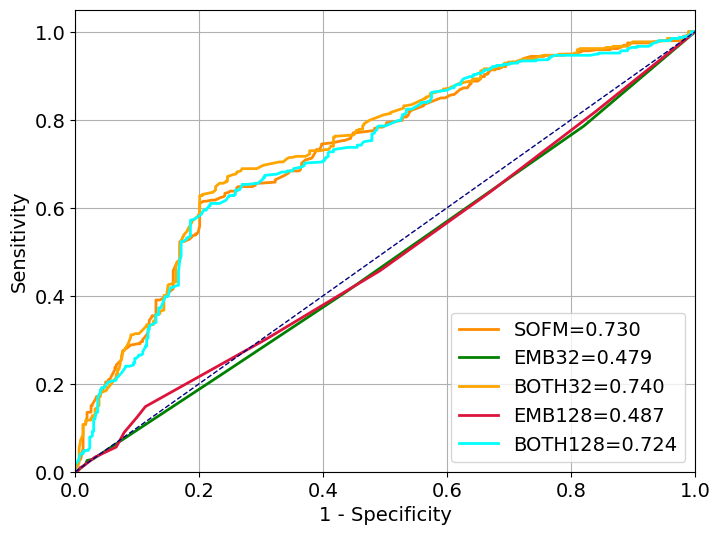

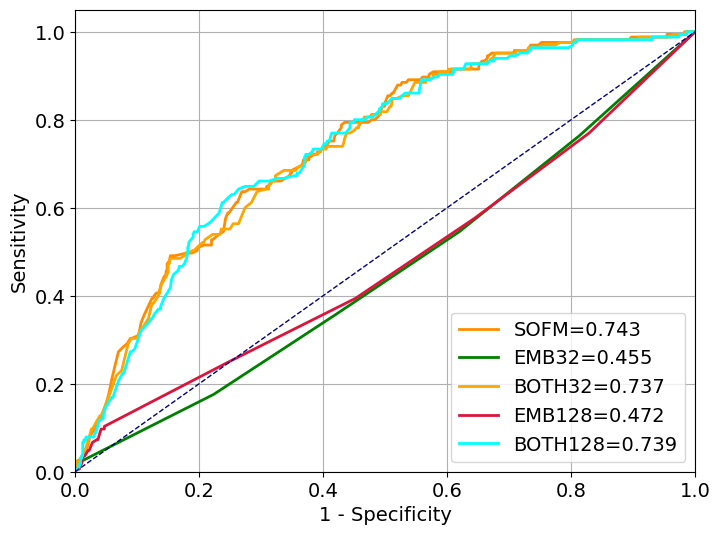

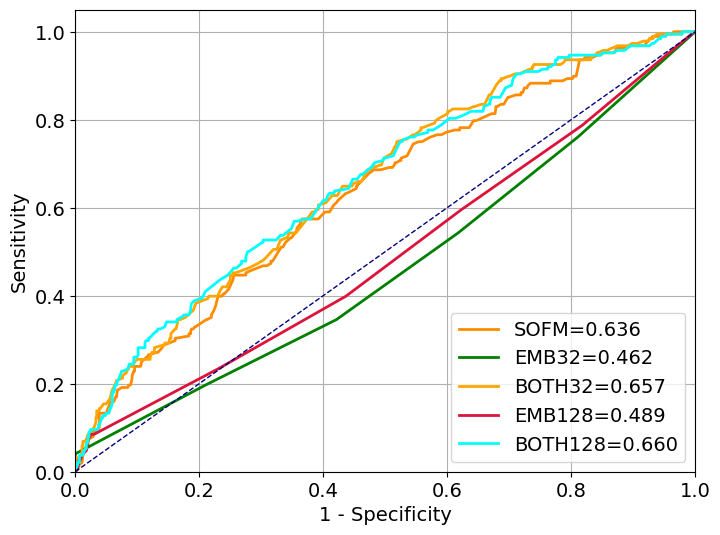

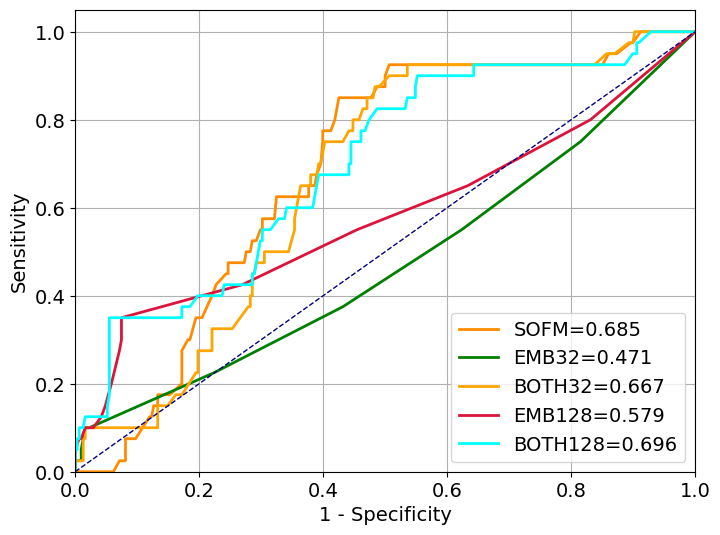

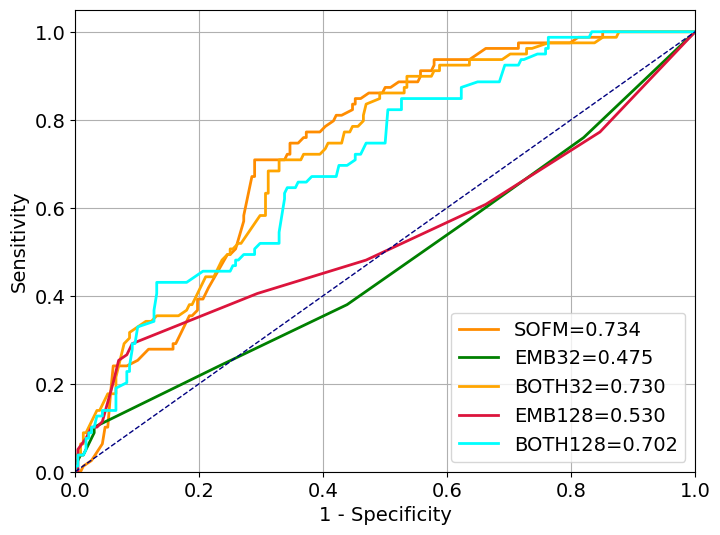

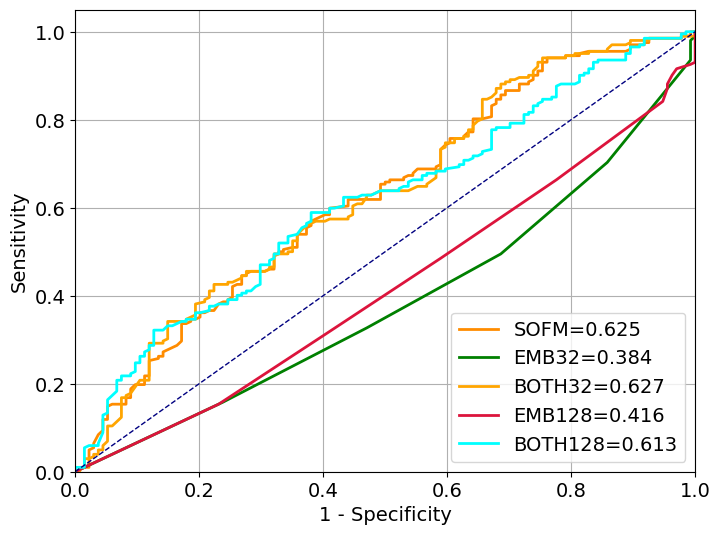

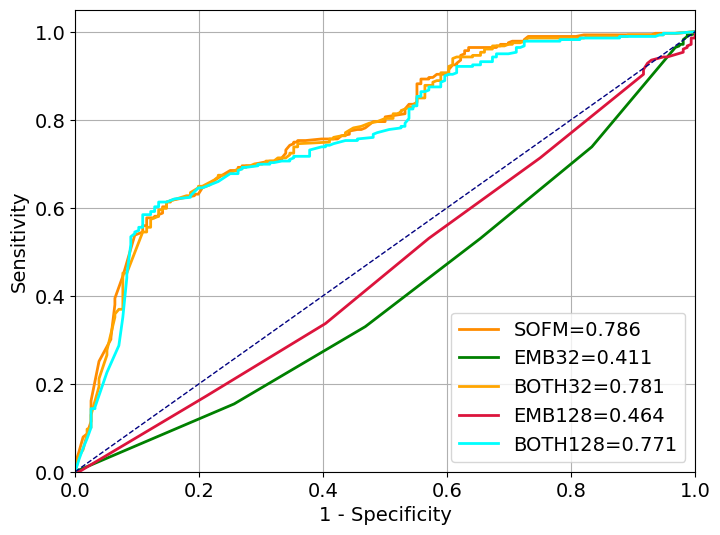

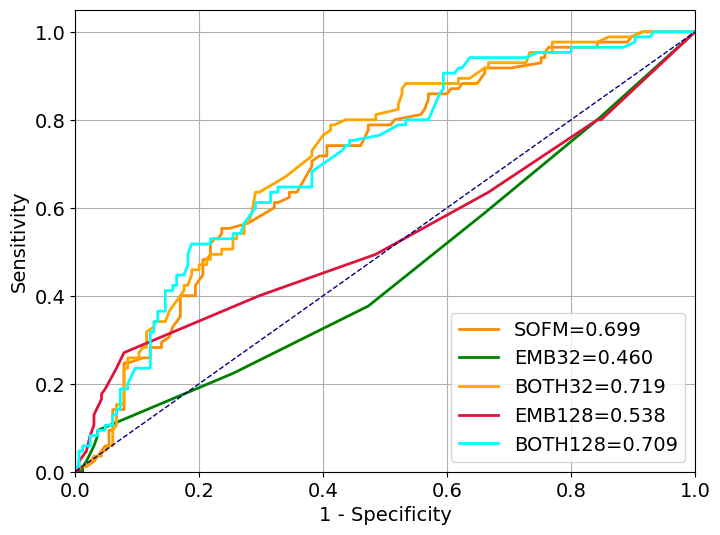

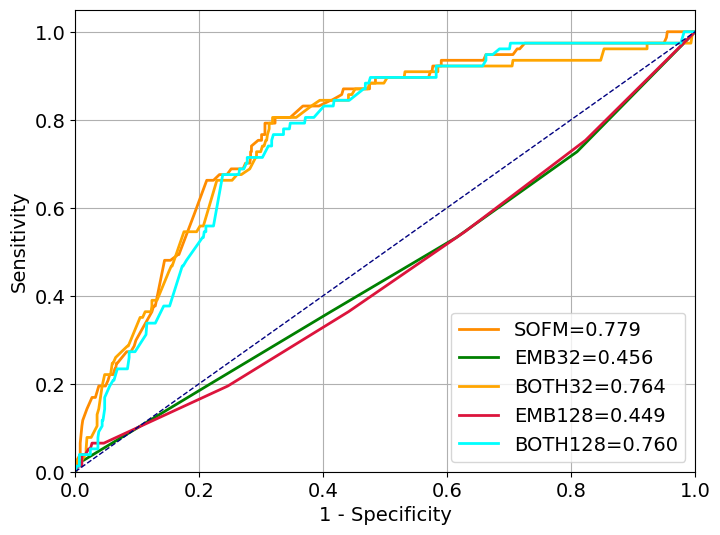

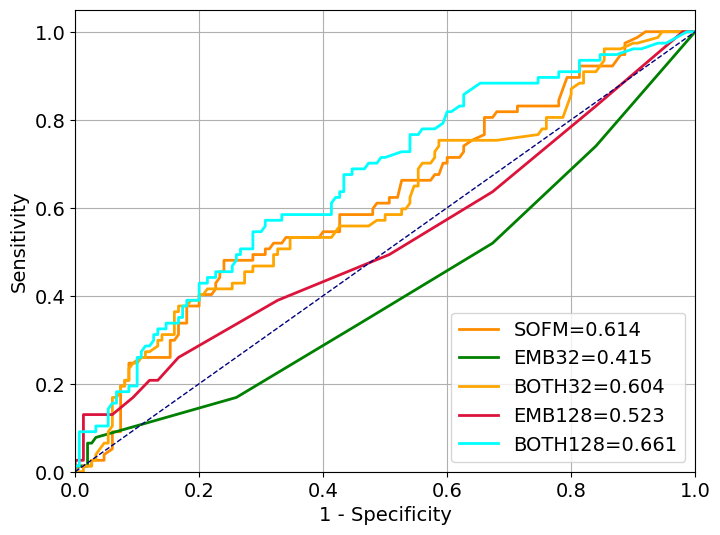

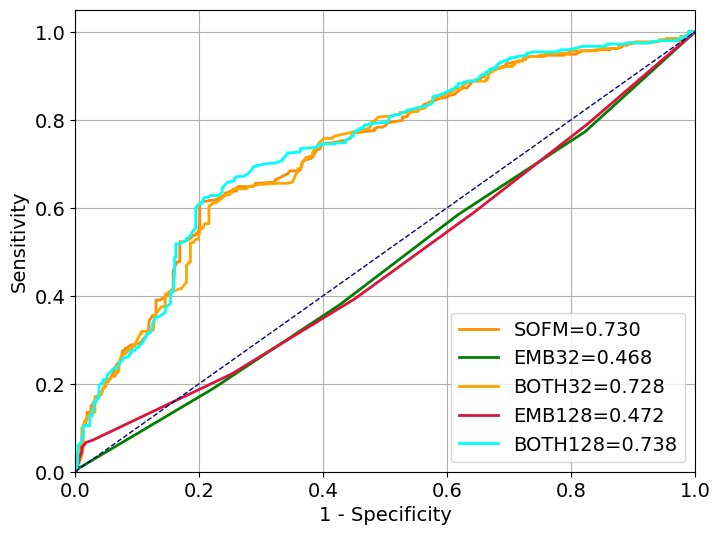

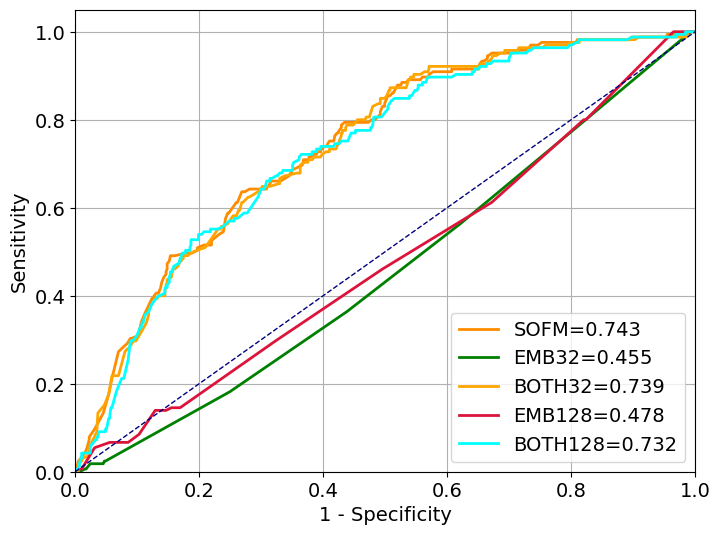

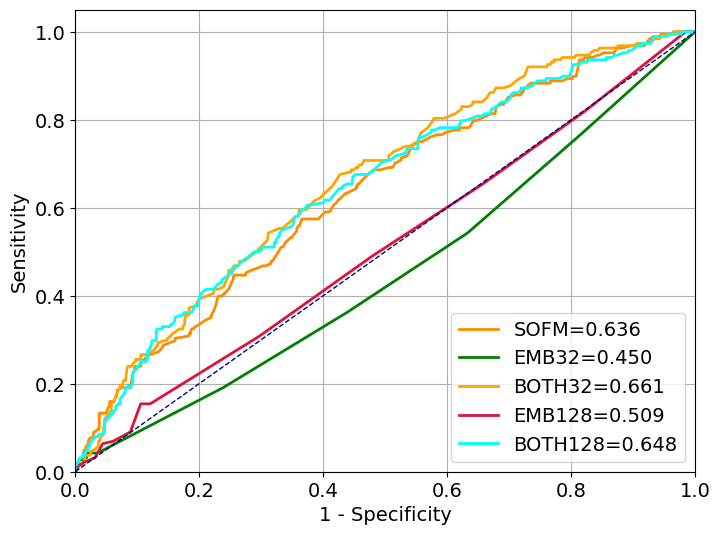

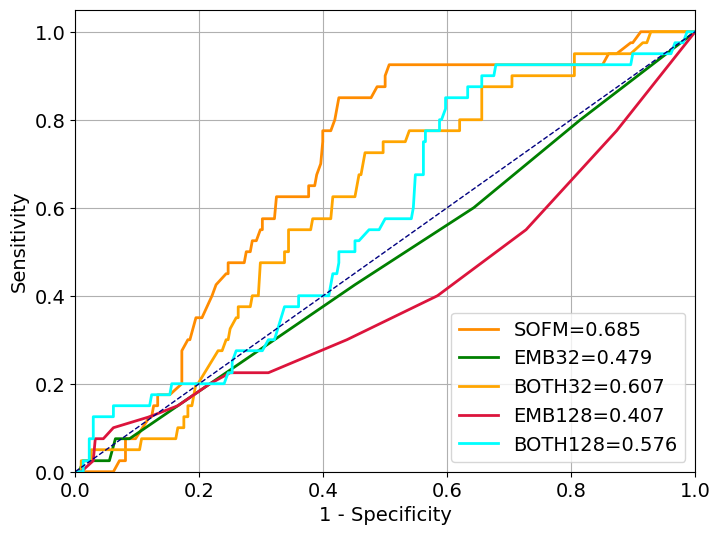

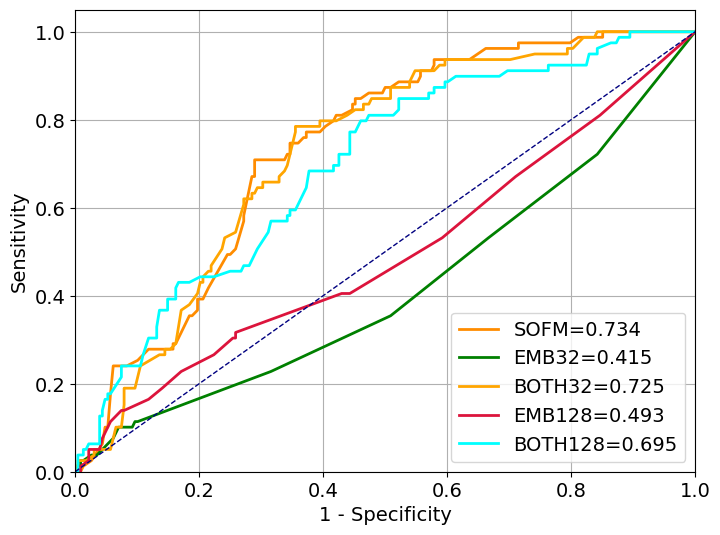

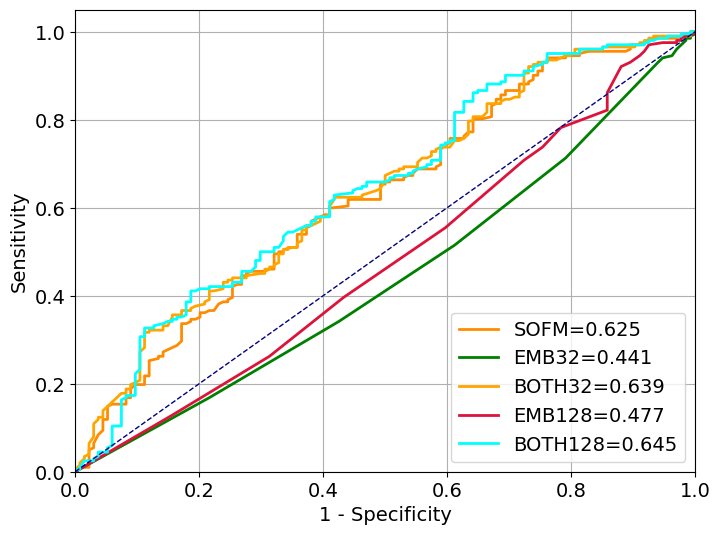

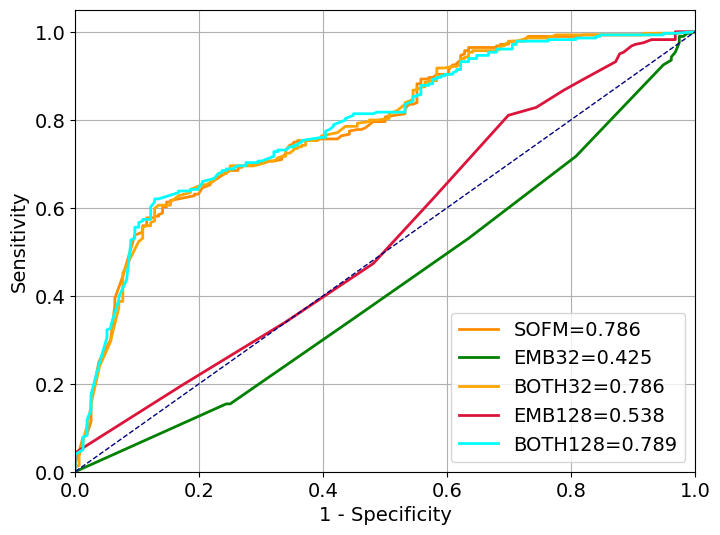

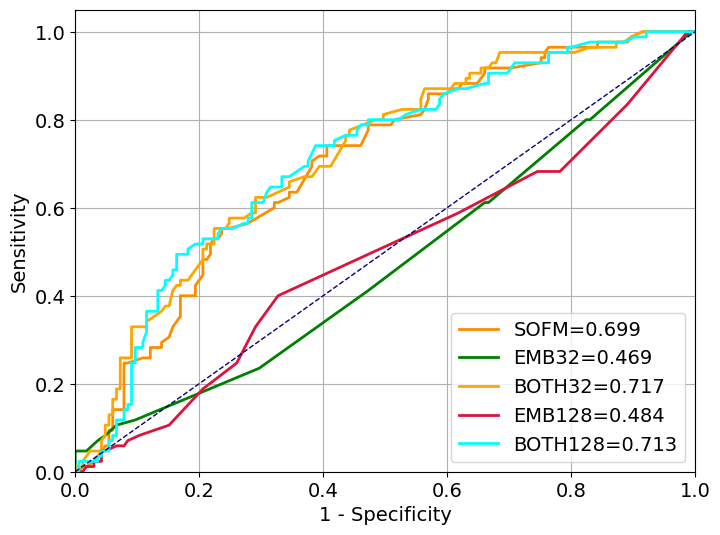

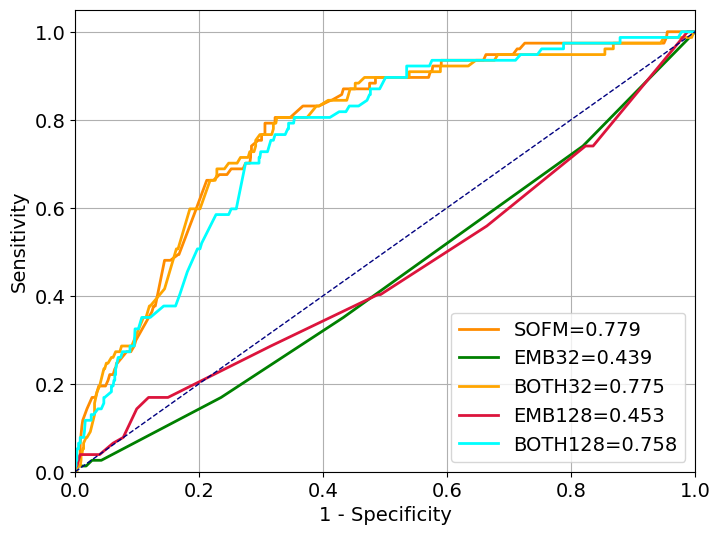

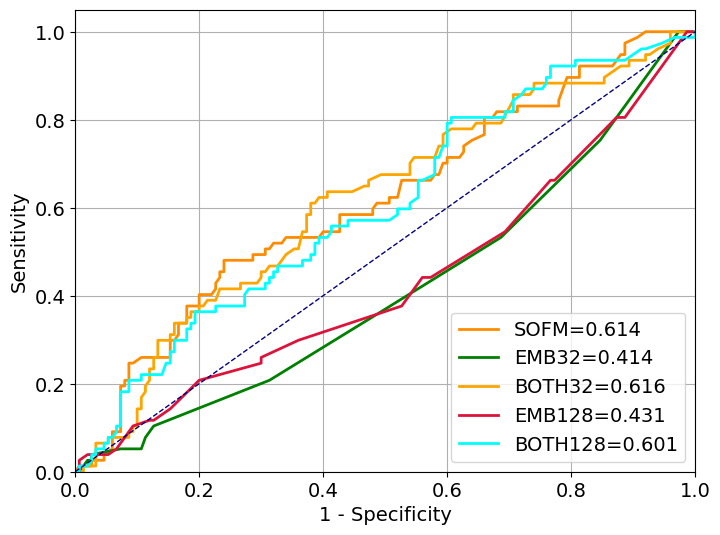

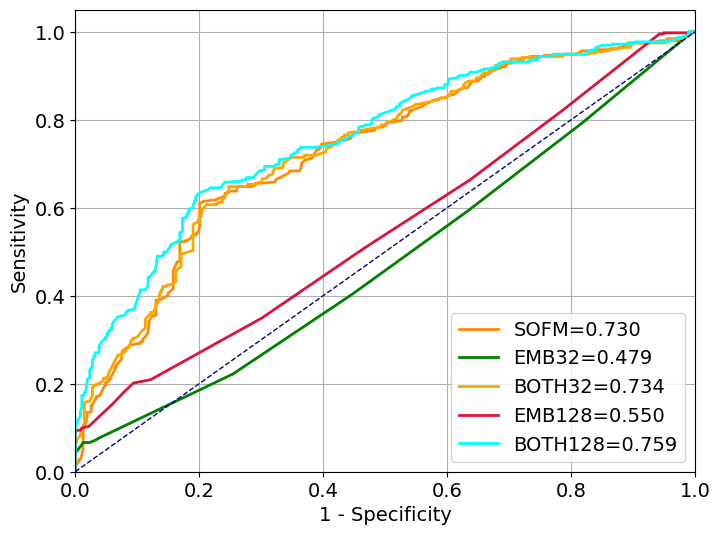

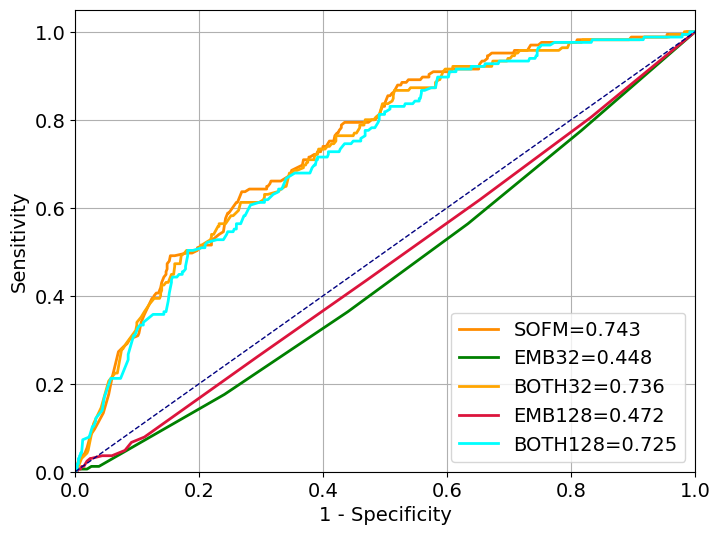

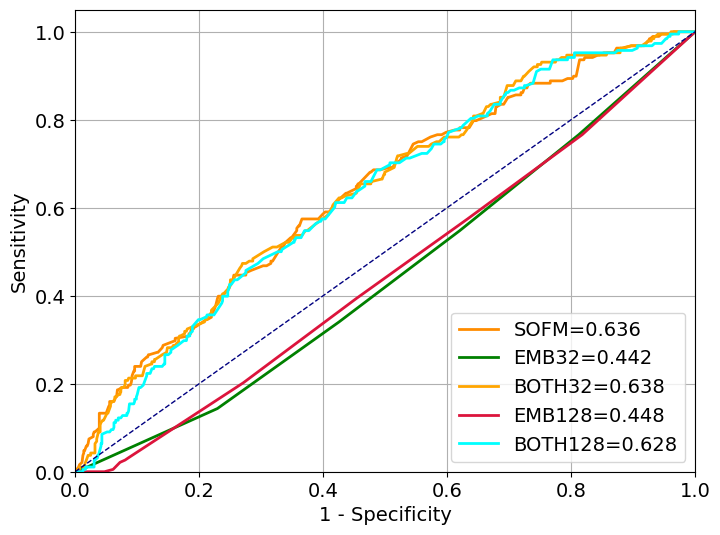

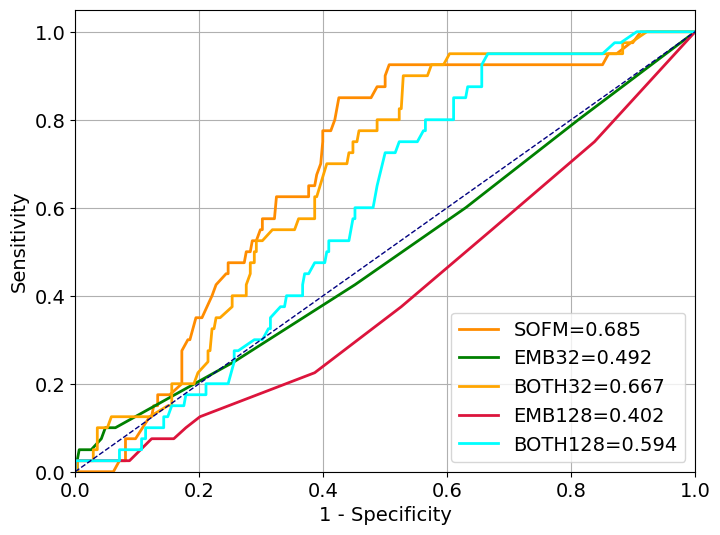

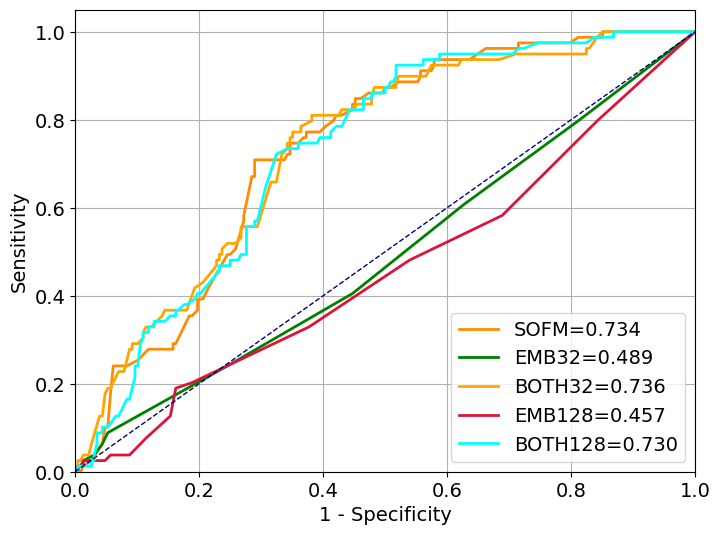

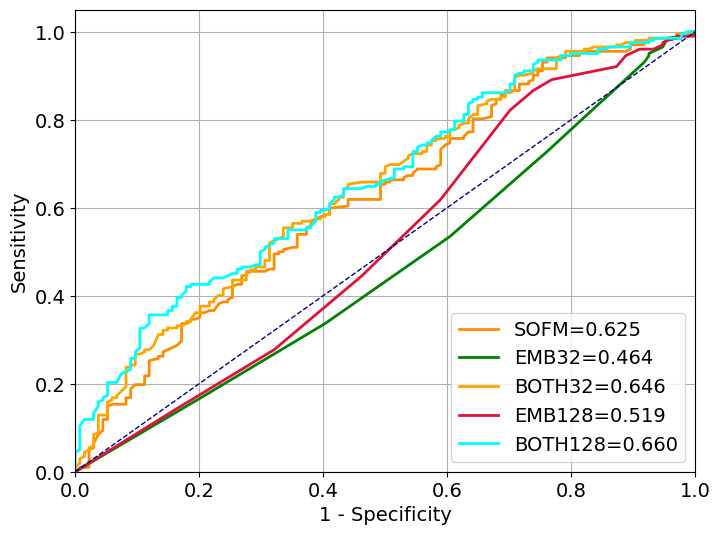

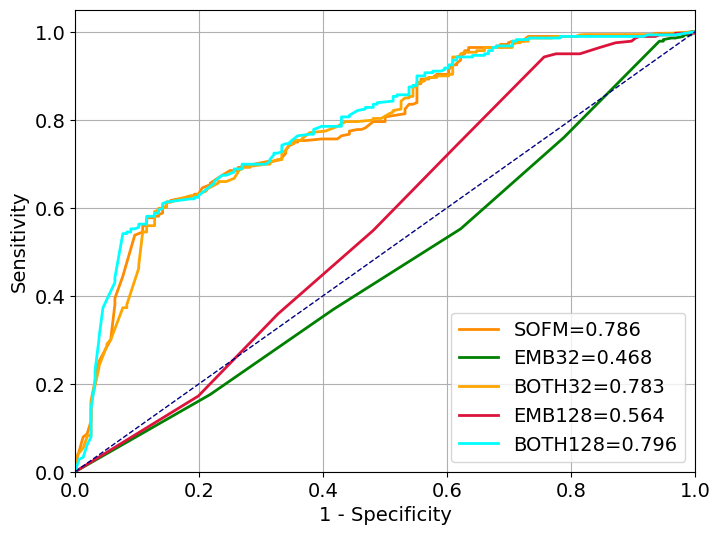

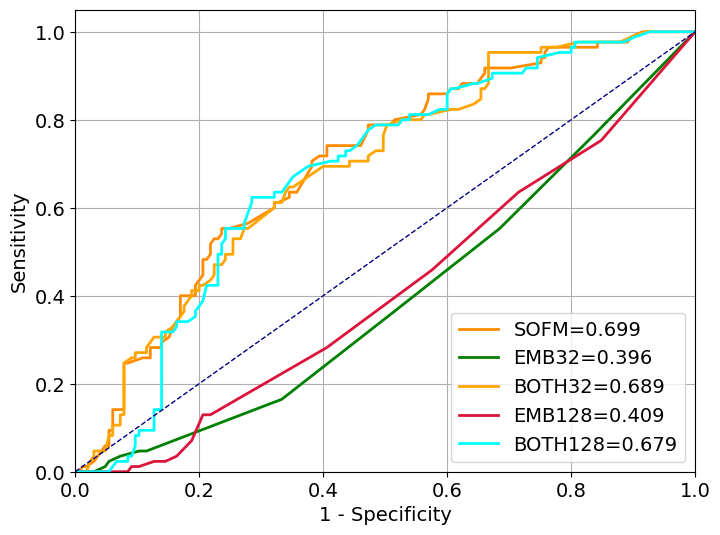

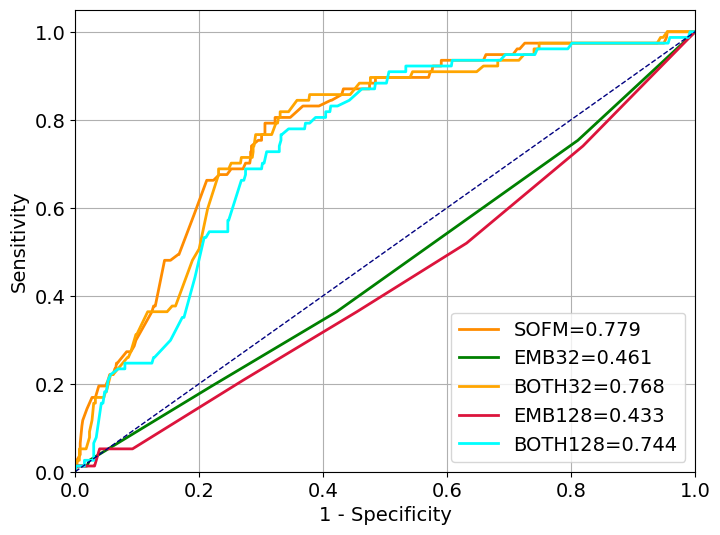

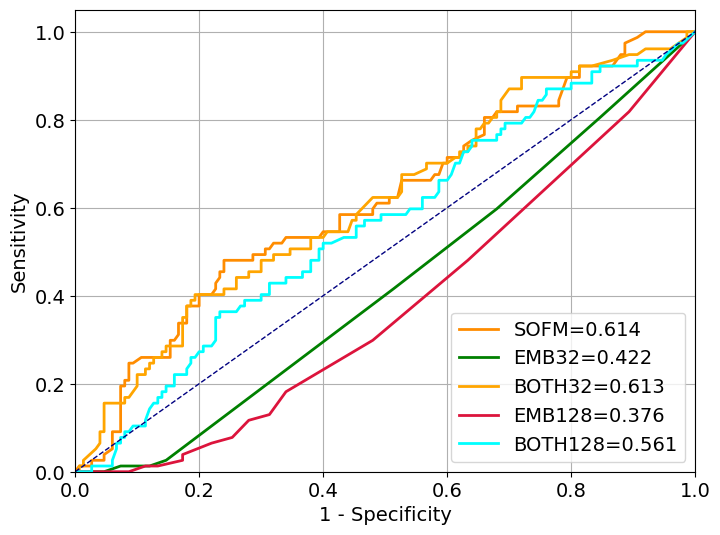

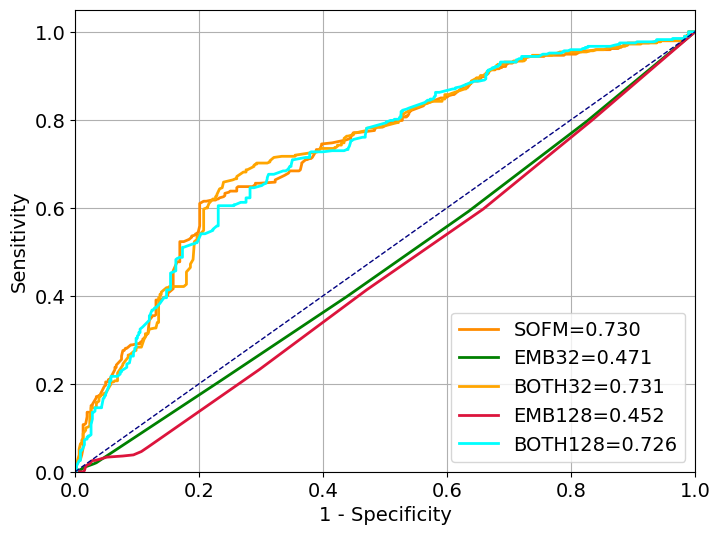

In [ ]:
t=1
for k in range(0,6):
  for i in range(0,10):
    fname= floc+str(i)+"predp.csv"
    data=np.genfromtxt(fname,delimiter=',')
    d=np.zeros((np.shape(data)[0],10))
    d[:,0]=data[:,t]
    d[:,1]=data[:,-1]
    for j in range(0,4):
      fname= floc+str(10+60*j+10*k+i)+"predp.csv"
      d1=np.genfromtxt(fname,delimiter=',')
      d[:,2+2*j]=d1[:,t]
      d[:,2+2*j+1]=d1[:,-1]
    gran(d,i,k,t)

In [ ]:
dn=np.zeros((250,2))
for i in range(0,250):
  fname= floc+str(i)+"predp.csv"
  data=np.genfromtxt(fname,delimiter=',')
  dn[i,:]=np.shape(data)

In [ ]:
fname=floc+'auc/'+'s.csv'
np.savetxt(fname,dn,delimiter=',',fmt='%f')

In [ ]:
d[:,0]

array([3.48600e-03, 2.14200e-02, 5.50658e-01, 4.06739e-01, 3.96746e-01,
       3.56570e-01, 3.87880e-02, 1.79516e-01, 5.29170e-02, 1.79516e-01,
       3.56570e-01, 7.58511e-01, 9.27310e-02, 3.35458e-01, 1.42600e-03,
       2.26997e-01, 8.74000e-04, 2.40009e-01, 1.48643e-01, 3.75700e-03,
       9.27310e-02, 8.74000e-04, 8.74000e-04, 7.58511e-01, 9.27310e-02,
       1.07909e-01, 1.56511e-01, 1.19570e-02, 1.28562e-01, 1.00085e-01,
       1.07909e-01, 4.44410e-01, 4.06739e-01, 1.28562e-01, 1.79516e-01,
       7.58511e-01, 1.49390e-02, 1.78787e-01, 3.11970e-02, 1.48643e-01,
       4.06739e-01, 2.00000e-06, 6.85149e-01, 3.35458e-01, 4.62120e-01,
       8.74000e-04, 2.40009e-01, 1.59280e-02, 3.22029e-01, 9.27310e-02,
       4.21504e-01, 2.26997e-01, 3.56570e-01, 7.58511e-01, 3.56570e-01,
       6.85149e-01, 3.56570e-01, 1.48643e-01, 9.27310e-02, 3.30900e-02,
       2.40009e-01, 5.50400e-02, 4.44410e-01, 3.56570e-01, 1.48643e-01,
       7.58511e-01, 1.48643e-01, 8.74000e-04, 9.27310e-02, 5.504

In [ ]:
d[:,1]

array([0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
       0., 0., 1., 0., 0.